# Vectorizing Complaint Descriptions

In this notebook, we will transform the cleaned complaint descriptions into numerical representations, a process known as vectorization. By converting text into vectors, we can use machine learning techniques to analyze and interpret patterns in the data. We will focus on two popular vectorization techniques:

1. **Bag-of-Words (BoW)**: This technique represents each complaint based on the frequency of words, capturing basic word counts across the dataset.
2. **TF-IDF (Term Frequency - Inverse Document Frequency)**: This method adjusts word frequencies by their importance, downweighting commonly used words and emphasizing words that are unique to individual complaints.

### Goals of this Notebook

- **Load Cleaned Data**: Begin by loading the preprocessed complaint data.
- **Apply Vectorization Techniques**: Generate BoW and TF-IDF matrices to represent the data in numerical form.
- **Analyze the Vectors**: Analyze the vectors by plotting them into a bar graph.
- **Save the Vectors**: Store the resulting matrices in `.npz` format to make them available for future analysis, such as topic modeling.

With these vectorized representations, we will have a structured and numerical format of the complaint data, which prepares us for identifying key themes and patterns in subsequent steps.


In [50]:
import pandas as pd
import scipy.sparse
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the cleaned complaint data
complaints_df = pd.read_csv('../data/processed/cleaned_complaints.csv')

# Display the first few rows to confirm successful loading
print(complaints_df.head())

                                      Complaint Text
0              painting base building without permit
1                  work done working building facade
2  construction rear yard addition without permit...
3                                painting front wall
4                             installation bar patio


In [3]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer(max_features=400)

# Fit and transform the complaint text to BoW vectors
bow_vectors = vectorizer_bow.fit_transform(complaints_df['Complaint Text'])

In [4]:
# Initialize TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=400)

# Fit and transform the complaint text to TF-IDF vectors
tfidf_vectors = vectorizer_tfidf.fit_transform(complaints_df['Complaint Text'])

### Here is an in-between step to visualize the two methods and their differences

Top N words in BoW:  ['installation' 'window' 'work' 'facade' 'replacement' 'signage' 'permit'
 'without' 'noncompliance' 'painting' 'building' 'door' 'construction'
 'ongoing' 'rear']
Top N words in TF-IDF:  ['installation' 'window' 'work' 'replacement' 'signage' 'facade' 'permit'
 'without' 'noncompliance' 'painting' 'door' 'construction' 'ongoing'
 'building' 'stoop']


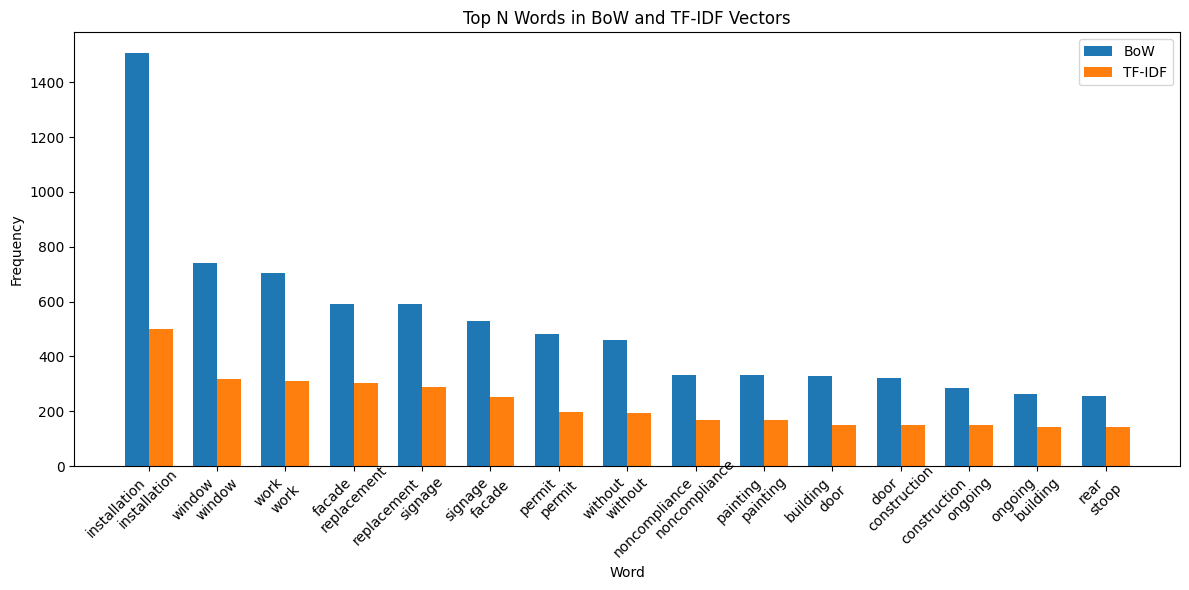

In [51]:
# Define n° of top words to display
N = 15

# Get the word frequencies from the BoW and TF-IDF vectors
bow_words = bow_vectors.toarray()
tfidf_words = tfidf_vectors.toarray()

# Get the feature names (i.e. the words) from the BoW and TF-IDF vectors
bow_feature_names = vectorizer_bow.get_feature_names_out()
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# Get the indices of the top N words in the BoW and TF-IDF vectors
bow_top_words = np.argsort(bow_words.sum(axis=0))[-N:][::-1]
tfidf_top_words = np.argsort(tfidf_words.sum(axis=0))[-N:][::-1]

# Get the word frequencies for the top N words in the BoW and TF-IDF vectors
bow_word_frequencies = bow_words.sum(axis=0)[bow_top_words]
tfidf_word_frequencies = tfidf_words.sum(axis=0)[tfidf_top_words]

# Get the word names for the top N words in the BoW and TF-IDF vectors
bow_top_word_names = bow_feature_names[bow_top_words]
tfidf_top_word_names = tfidf_feature_names[tfidf_top_words]

# Print top N words in BoW and TF-IDF vectors
print("Top N words in BoW: ", bow_top_word_names)
print("Top N words in TF-IDF: ", tfidf_top_word_names)

x = np.arange(N)


# Create grouped bar chart to compare top N word frequencies
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - 0.35/2, bow_word_frequencies, 0.35, label='BoW')
ax.bar(x + 0.35/2, tfidf_word_frequencies, 0.35, label='TF-IDF')

ax.set_xticks(x)
ax.set_xticklabels(bow_top_word_names, rotation=45, ha='right')

# Set the names next to each other for a more comprehensive view
for i in range(N):
    ax.text(x[i], -max(np.max(bow_word_frequencies), np.max(tfidf_word_frequencies)) * 0.08, 
            tfidf_top_word_names[i], ha='center', va='center', rotation=45, fontsize=10)

# Labels and title
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top N Words in BoW and TF-IDF Vectors')
ax.legend()
plt.tight_layout()
plt.show()

### Creation of the percentages of the word frequencies
This step help us have a better understanding in term of percentage

In [47]:
# For BoW, calculate the percentage of total frequency
total_freq_bow = bow_word_frequencies.sum()
bow_percentage = (bow_word_frequencies / total_freq_bow) * 100


# For TF-IDF, calculate the percentage of total TF-IDF scores
total_tfidf_score = tfidf_word_frequencies.sum()
tfidf_percentage = (tfidf_word_frequencies / total_tfidf_score) * 100

for i in range(len(bow_top_word_names)):
    print("Bow percentages:", bow_percentage[i], bow_top_word_names[i])
print()
for i in range(len(tfidf_top_word_names)):
    print("TF-IDF percentages:", tfidf_percentage[i], tfidf_top_word_names[i])

Bow percentages: 19.495472186287195 installation
Bow percentages: 9.586028460543337 window
Bow percentages: 9.120310478654591 work
Bow percentages: 7.6584734799482534 facade
Bow percentages: 7.632600258732213 replacement
Bow percentages: 6.85640362225097 signage
Bow percentages: 6.222509702457956 permit
Bow percentages: 5.9637774902975424 without
Bow percentages: 4.307891332470892 noncompliance
Bow percentages: 4.294954721862871 painting
Bow percentages: 4.269081500646831 building
Bow percentages: 4.178525226390685 door
Bow percentages: 3.6739974126778785 construction
Bow percentages: 3.4152652005174646 ongoing
Bow percentages: 3.3247089262613194 rear

TF-IDF percentages: 14.528957794475023 installation
TF-IDF percentages: 9.219859691666302 window
TF-IDF percentages: 9.084660235359754 work
TF-IDF percentages: 8.783952795712068 replacement
TF-IDF percentages: 8.444363317718258 signage
TF-IDF percentages: 7.31512237608584 facade
TF-IDF percentages: 5.765402132743554 permit
TF-IDF percent

### Analysis of Top N Words in BoW and TF-IDF Vectors

This chart shows the frequency of the top N words in Bag-of-Words (BoW) and TF-IDF models.

1. **Higher Frequencies in BoW**:
   - BoW has significantly higher frequencies because it simply counts each word's occurrences. This leads to larger raw counts, especially for commonly used words.

2. **Weighting in TF-IDF**:
   - TF-IDF frequencies are lower since it reduces the importance of words that appear frequently across documents. Instead, TF-IDF highlights words that are more unique or informative in individual documents. This is also why there are differences in the top words that are displayed.

3. **Different Word Importance**:
   - BoW assigns high importance to frequently used words, while TF-IDF emphasizes less common but more informative words. This difference impacts the interpretation of topics, as BoW is frequency-focused, and TF-IDF prioritizes unique terms.

This comparison shows how BoW and TF-IDF differ in word importance, which affects the results and interpretation in topic modeling.

In [49]:
# Save BoW vectors
scipy.sparse.save_npz('../data/processed/bow_vectors.npz', bow_vectors)
# Saving the vectorized object for further use
with open('../data/processed/vectorizer_bow.pkl', 'wb') as f:
    pickle.dump(vectorizer_bow, f)
# Save TF-IDF vectors
scipy.sparse.save_npz('../data/processed/tfidf_vectors.npz', tfidf_vectors)
with open('../data/processed/vectorizer_tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer_tfidf, f)

### Saving Vectorized Data

We save the Bag-of-Words and TF-IDF matrices in compressed `.npz` format. This format is efficient for storing large sparse matrices, allowing us to easily reload these vectors in future notebooks without repeating the vectorization process.
